# Homework 9

The block below imports the necessary packages, functions, and datasets.

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

from sklearn.datasets import load_digits

digits = load_digits()
X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

The function below is a useful way to visualize a datapoint in the MNIST dataset.

In [2]:
def show_image(digit_data, n, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    img = digit_data[n].reshape(8,8)
    colormap = ax.imshow(img, cmap='binary', vmin=0, vmax=16)
    ax.get_figure().colorbar(colormap, ax=ax)

## 1. Low-dimensional Representation

In this problem, you will play with low-dimensional representations obtained from PCA and their reconstructed data using the MNIST data imported above. The below are the requirements:

- Use PCA to project the MNIST data onto 32 dimensions.
- Select the points labeled as the number 8.
- Take the average of these points.
- Project the resulting average vector back to the 64-D space.
- Create a 1x2 subplot (code provided).
- On the left plot, visualize any one data point labeled as 8 as an 8x8 image.
- On the right plot, visualize the reconstructed vector as an 8x8 image.

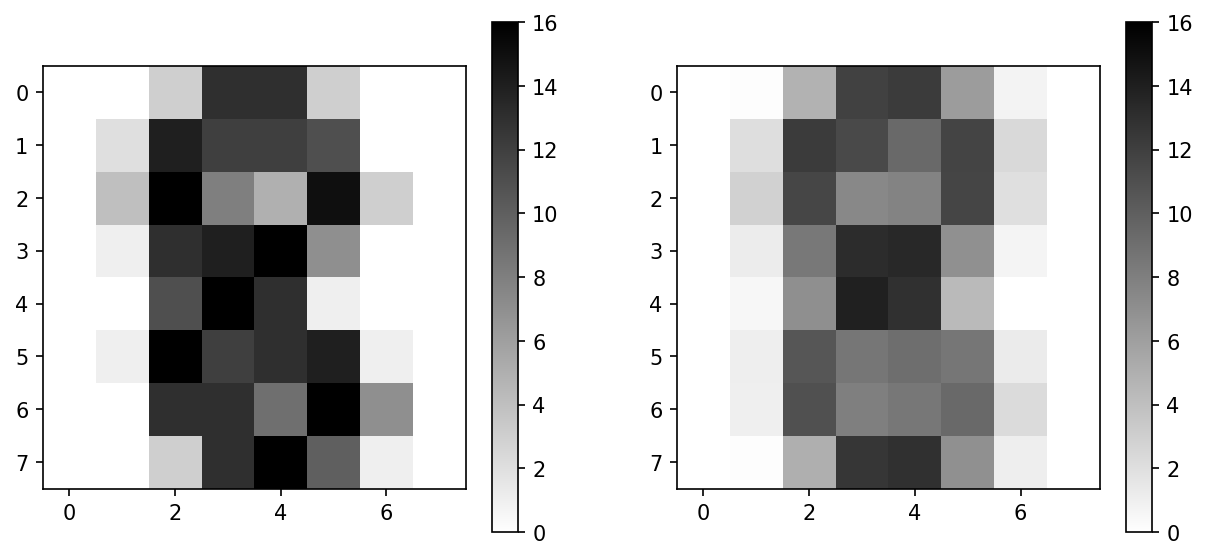

In [3]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4.5), dpi =150)

from sklearn.decomposition import PCA

pca = PCA(n_components = 32)
X_pca = pca.fit_transform(X_mnist)

X_pca_8_mean = X_pca[y_mnist == 8].mean(axis = 0)
X_reconstructed = pca.inverse_transform(X_pca_8_mean).reshape(1, -1)

show_image(X_mnist[y_mnist == 8], 14, ax = axes[0])
show_image(X_reconstructed, 0, ax = axes[1])

Repeat the same process, but project the data onto 10 dimensions in this case.

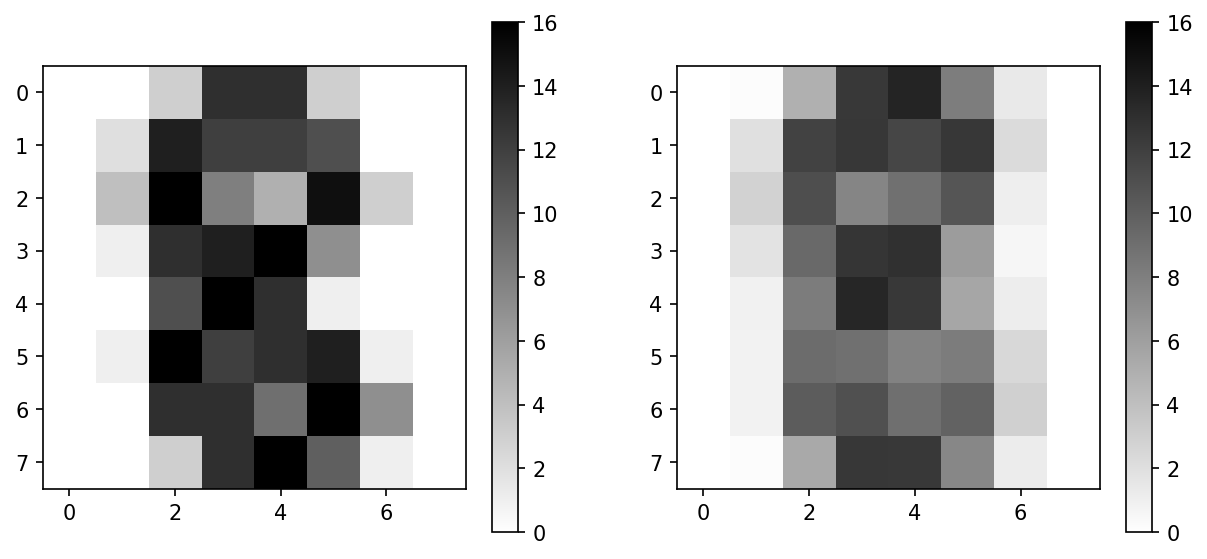

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4.5), dpi =150)

from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
X_pca = pca.fit_transform(X_mnist)

X_pca_8_mean = X_pca[y_mnist == 8].mean(axis = 0)
X_reconstructed = pca.inverse_transform(X_pca_8_mean).reshape(1, -1)

show_image(X_mnist[y_mnist == 8], 14, ax = axes[0])
show_image(X_reconstructed, 0, ax = axes[1])

In which case does the reconstructed data look closer to the original image? Briefly discuss why.

**Answer**

There is no such difference between the two reconstructed images. One possible reason is that the first few principal components already contain most of the important information of original images.

## 2. Kernel PCA projection

When dealing with high-dimensional data, it is often useful to visualize the data onto 2 dimensional space, although we may lose some information by doing so. This process will provide us with some insights of how the dataset looks like and how we should proceed with it. 

Below, a 1x4 subplot is provided for you. On the far left plot, utilize regular PCA to project the data onto two dimensions. On the middle and right-hand plots, utilize kernel PCA with the `rbf` kernel with three different values of the kernel width. All datapoints should be color-coded by their labels. Set the subfigure title to the value of kernel width that you used.

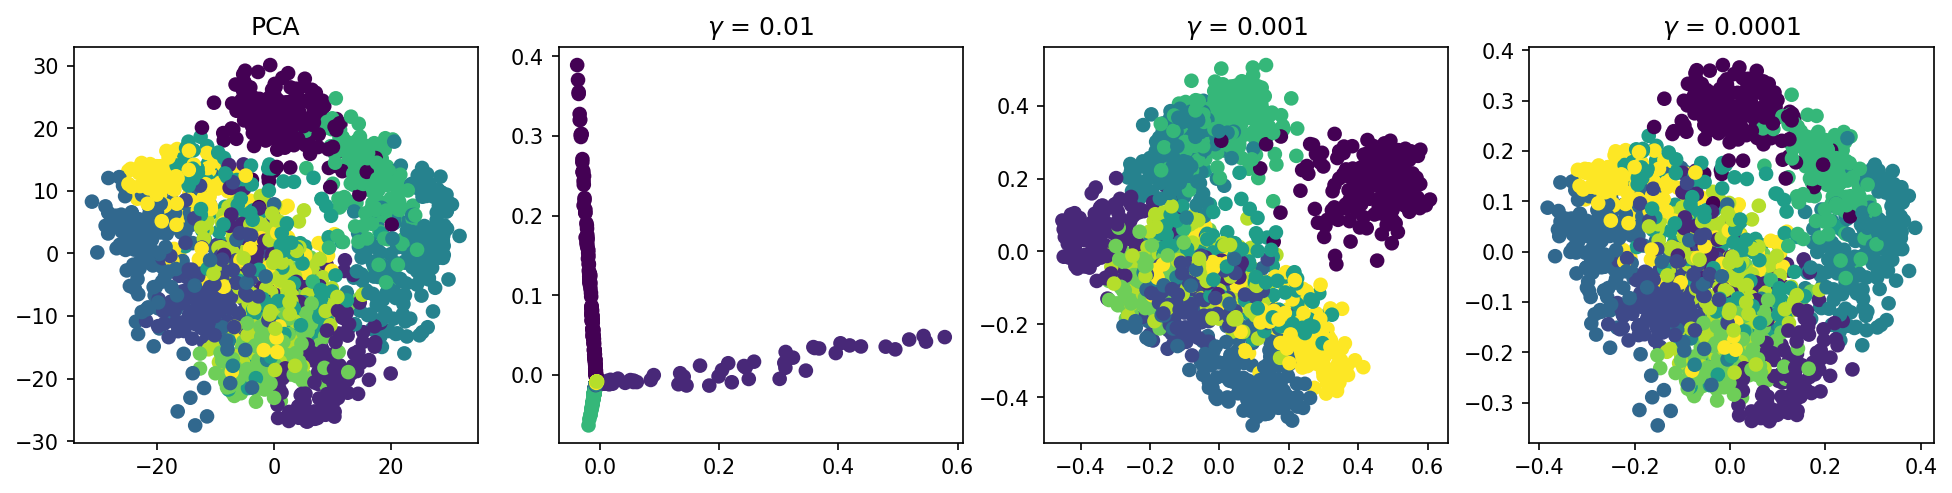

In [5]:
fig, axes = plt.subplots(1, 4, figsize = (16, 3.5), dpi = 150)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_mnist)

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c = y_mnist)
axes[0].set_title('PCA')

from sklearn.decomposition import KernelPCA

gammas = [1e-2, 1e-3, 1e-4]
for i, ax in enumerate(axes[1:]):
    kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = gammas[i])
    X_kpca = kpca.fit_transform(X_mnist)
    
    ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c = y_mnist)
    ax.set_title(r'$\gamma$ = {}'.format(gammas[i]))

Which of these projections do you think provides the most insight?

**Answer**

`KernelPCA(gamma = 1e-3)` gives the best separation for digits of 8. As `gamma` becomes smaller, the `KernelPCA` gives the same result as the regular PCA while no insights can be found from bigger `gamma`.

## 3. Comparing dimensional reduction algorithms
PCA is a very common dimensional reduction approach, but many others exist. Each one has different tradeoffs, including non-linear projections, projectability, and invertability.

Below, a 1x3 subplot is provided for you. Choose 3 different dimensional reduction approaches and project the MNIST data onto 2 dimensional space. Visualize the projected data in each subfigure with datapoints color-coded by their labels. Set the subfigure title to the algorithm you've used.

/usr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


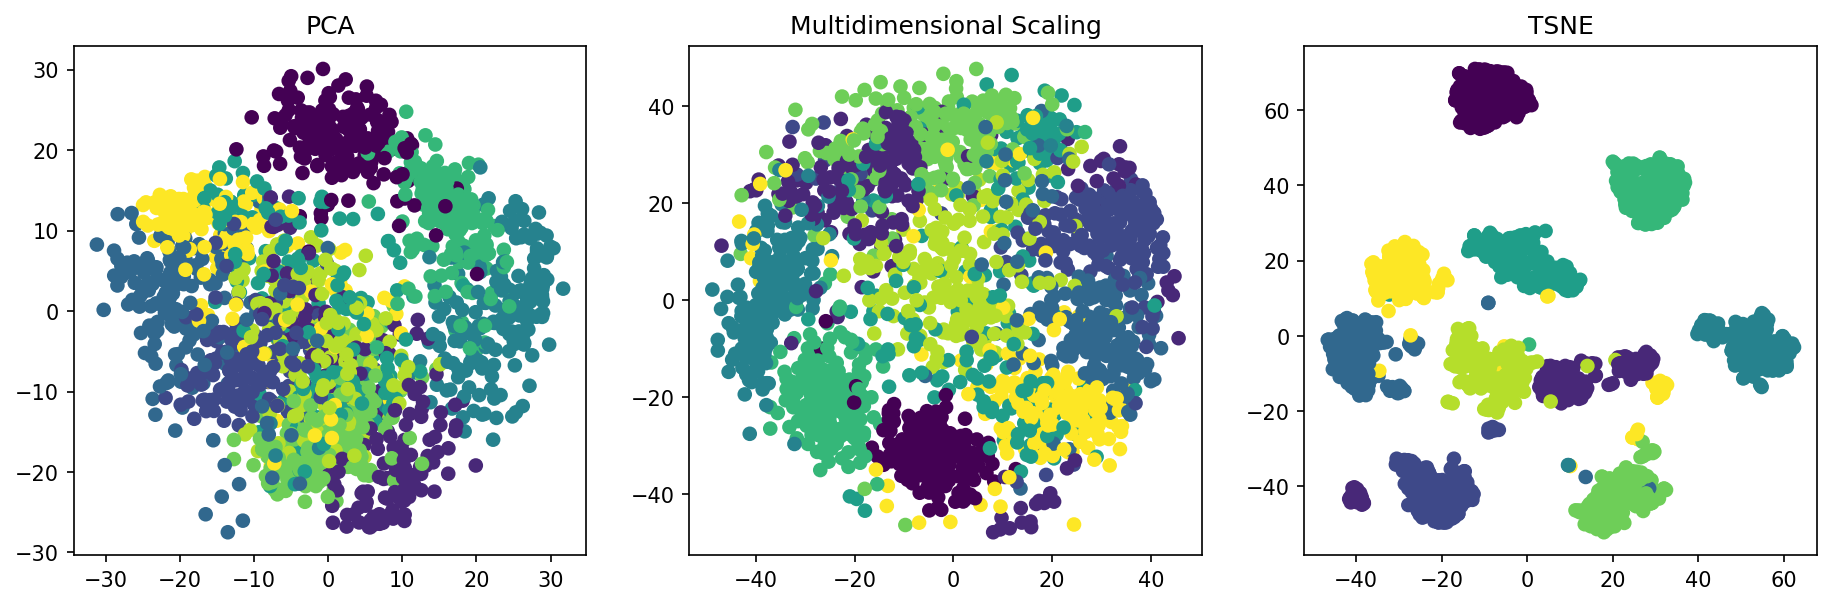

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4.5), dpi = 150)

from sklearn.manifold import MDS, TSNE

algorithms = [PCA(n_components = 2), MDS(n_components = 2), TSNE(n_components = 2)]
title = ['PCA', 'Multidimensional Scaling', 'TSNE']

for i, algorithm in enumerate(algorithms):
    X_alg = algorithm.fit_transform(X_mnist)
    axes[i].scatter(X_alg[:, 0], X_alg[:, 1], c = y_mnist)
    axes[i].set_title(title[i])

For each of the algorithms you selected, note whether it is **projectable** (a new data point can be projected onto the sub-space) and/or **invertable** (high-dimensional data can be re-constructed from the low-dimensional space). 

**Answer**

- PCA: projectable & invertable
- MDS: not projectable & not invertable
- TSNE: not projectable & not invertable